# Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

### You are expected to do the following :

1. Come up with a customer profile (characteristics of a customer) of the different products
2. Perform univariate and multivariate analyses
3. Generate a set of insights and recommendations that will help the company in targeting new customers.
 

### Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables:

1. Product: The model no. of the treadmill
2. Age: Age of the customer in no of years
3. Gender: Gender of the customer
4. Education: Education of the customer in no. of years
5. Marital Status: Marital status of the customer
6. Usage: Avg. # times the customer wants to use the treadmill every week
7. Fitness: Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income: Income of the customer
9. Miles: Miles that a customer expects to run

In [1]:
# Importing the Neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas_profiling
from matplotlib.gridspec import GridSpec
import pylab

# Setting the visual options for seaborn
sns.set_theme(color_codes=True,
              style='darkgrid', 
              context='talk', 
              palette='hls',
              font_scale=0.75)

%matplotlib inline

# Reading the data
CGF = pd.read_csv('CardioGoodFitness.csv')

# Objective:

Create a customer profile for each of the treadmills by performing univariate and multivariate analysis. From this analysis generate a set of insights and recommendations that will help the company target new customers for their products.

## Step 1: General Overview of the data

In [2]:
# Creating an EDA report
pandas_profiling.ProfileReport(CGF)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Converting the EDA Report to html
pandas_profiling.ProfileReport(CGF).to_file('CGF_EDA_Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Initial Observations:

#### Categories with significant correlations:
- Age, Education, and Income (Positive)
- Usage, Miles, and Fitness (Positive)

All these correlations seem to track with what one might expect.

#### Other observations from the report:
- The TM195 is the most popular model with 80 units
    - TM498 is next with 60
    - TM798 is last with 40
- Mean age: 28 years
    - Minimum: 18 years
    - Maximum: 50 years
- Mean education: 15-16 years
    - Minimum: 12 years
    - Maximum: 21 years
- Marital status is fairly even at a 60/40 split of partnered to single
- Mean usage for each user is 3.5 days
    - Minimum: 2 days
    - Maximum: 7 days
- The Fitness level is overwhelming in the middle at 3 (54%)
    - Levels 5, 4, and 2 are mostly even at 17%, 13%, and 14%
    - The remaining 1% of responses is the lowest fitness level: 1
- The mean miles expected to run is 103
    - Minimum: 21
    - Maximum: 360
- Mean income is 53k, but standard deviation is quite high at 16k. This will be the first variable we investigate.

## Step 2: Investigating Correlations and Observations

### 2.1: What is the relationship between income and each product (sorted by gender)?

#### Overview of relevant data:

                      Income                    
                        mean           std count
Product Gender                                  
TM195   Female  46020.075000   9226.214704    40
        Male    46815.975000   9022.407705    40
TM498   Female  49336.448276   7984.486277    29
        Male    48634.258065   9356.202876    31
TM798   Female  73633.857143  19009.925227     7
        Male    75825.030303  18675.002521    33


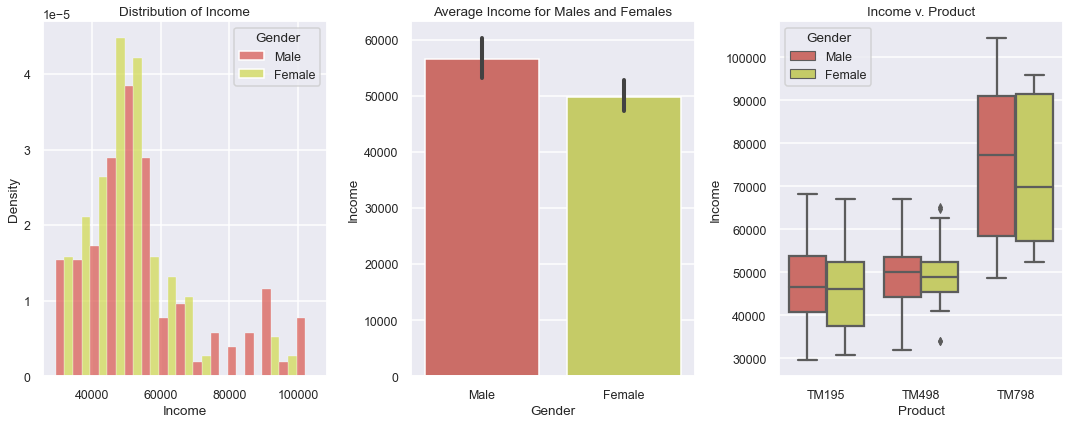

In [4]:
# Average income of male and female clients who own each treadmill as well as how many units per gender
print(CGF.groupby(['Product', 'Gender']).agg({'Income':['mean', 'std', 'count']}))

# Visualizing the income distribution of male versus female
fig, axes = plt.subplots(1, 3)
sns.histplot(data=CGF, x='Income', hue='Gender', multiple='dodge', stat='density', common_norm=False, ax=axes[0]);
axes[0].set_title('Distribution of Income')
sns.barplot(data=CGF, y='Income', x='Gender', ax=axes[1])
axes[1].set_title("Average Income for Males and Females")
sns.boxplot(data=CGF, x='Product', y='Income', hue='Gender', ax=axes[2]);
axes[2].set_title("Income v. Product")

plt.tight_layout(rect=(0, 0, 2.5, 1.5))

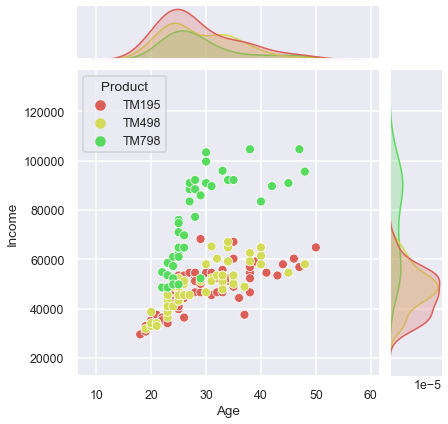

In [5]:
# Visualizing relationship between income and Age, Education, and Marital Status

# Income versus Age
sns.jointplot(data=CGF, x='Age', y='Income', hue='Product');

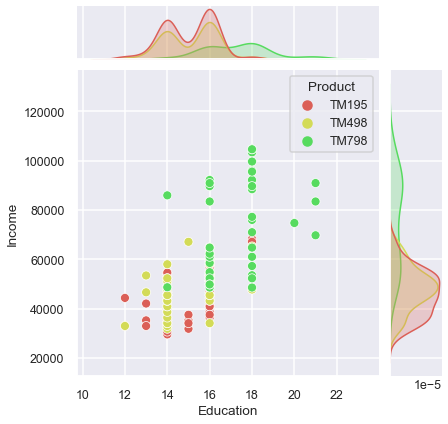

In [6]:
# Income versus Education
sns.jointplot(data=CGF, x='Education', y='Income', hue='Product');

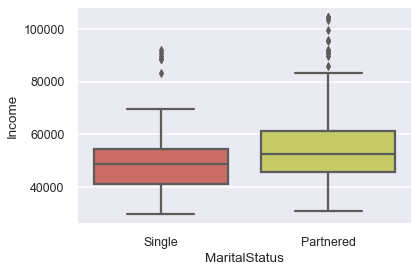

In [7]:
# Income versus Marital Status
sns.boxplot(data=CGF, x='MaritalStatus', y='Income');

From these visualizations we can see that as the EDA report suggested, Age and Income are positively correlated. Additionally, those who are married appear to make slightly more than those who are not. Furthermore, the jointplots clearly show that the TM798 is primarily owned by those with a higher income while the TM498 and TM195 are not.

#### 2.1.1: Is there enough statistical evidence to suggest that females make less than males on average?

- Null Hypothesis: The mean income of males and females is the same

>$H_0: \mu_M = \mu_F$

- Alternative Hypothesis: The mean income of males is greater than females

> $H_a: \mu_M > \mu_F$

In [8]:
# Creating a Multi-Index organized by Gender for easier data parsing
CGF_G = pd.read_csv('CardioGoodFitness.csv')
CGF_G.set_index(['Gender'], inplace=True)
CGF_G.sort_index(inplace=True)

The skew for females income distribution is: 1.5434267365130099
The skew for males income distribution is: 1.0248328859499014


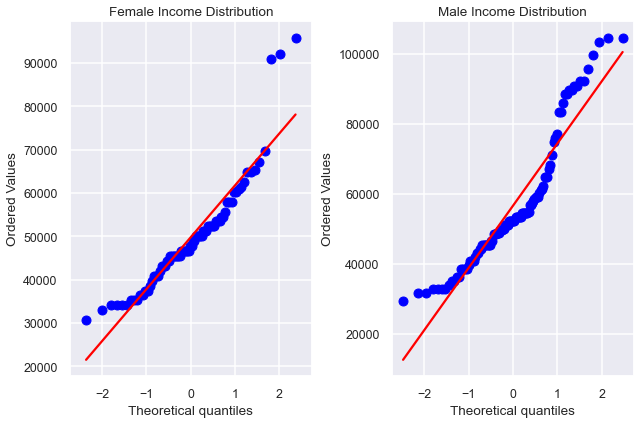

In [9]:
# Checking whether income is normally distributed
ax1 = plt.subplot(121)
stats.probplot(CGF_G.loc[('Female', 'Income')], plot=pylab);
plt.title('Female Income Distribution')

ax2 = plt.subplot(122, sharex = ax1)
stats.probplot(CGF_G.loc[('Male', 'Income')], plot=pylab);
plt.title('Male Income Distribution')

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

# Checking the numerical value of the skew for income
print('The skew for females income distribution is:', CGF_G.loc[('Female', 'Income')].skew())
print('The skew for males income distribution is:', CGF_G.loc[('Male', 'Income')].skew())

The income distribution for females and males is, for the most part, normally distributed. Some significant outliers in the females income are creating a higher skew. Males also have a slight skew, but due to a higher sample size, is more evenly distributed. We can correct for this skew using a boxcox transformation.

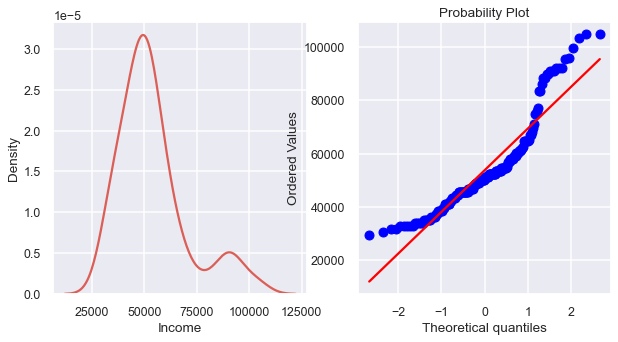

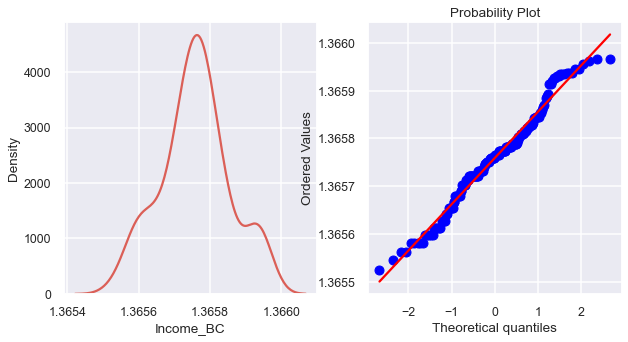

0.018081350293364797


In [10]:
# Defining a function to return a KDE and Q-Q Plot to check whether a successful transformation to normality has occurred
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

# Original data distribution
normality(CGF, 'Income')

# Box-Cox Transformation
CGF['Income_BC'], fitted_lambda=stats.boxcox(CGF['Income'])
normality(CGF, 'Income_BC')

print(CGF['Income_BC'].skew())

Now that the data has been successfully transformed to a more normal distribution, we can perform a two sample Z-test to determine whether the Null Hypothesis is valid or not.

In [11]:
# User-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# This function returns the p-value for one tailed test
# For two-tailed test, multiply the p-value by 2
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - Population standard deviation of sample 1
    pop_sd2 - Population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs
    from scipy.stats import norm
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2)
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se
    pval = 1 - norm.cdf(abs(test_stat))
    return pval

In [12]:
# Applying the skew correction to normalize the data
CGF_G['Income_BC'], fitted_lambda=stats.boxcox(CGF_G['Income'])

p_value = ztest_2samp(CGF_G.loc[('Male', 'Income_BC')], 
                      CGF_G.loc[('Female', 'Income_BC')], 
                      CGF_G.loc[('Male', 'Income_BC')].std(), 
                      CGF_G.loc[('Female', 'Income_BC')].std(), 
                      104, 76)

print('The p-value is:', round(p_value * 100, 4), 'percent')

The p-value is: 0.7927 percent


Because the p-value is less than the 5% level of significance, we can reject the null hypothesis. There is indeed, enough statistical evidence to suggest that males make more than females on average.

#### 2.1.2: Investigating probabilities of each income bracket sorted by product and gender.

In [13]:
# Importing the required function
from scipy.stats import norm

# Defining mu and sigma
MI_mu = CGF_G.loc[('Male', 'Income')].mean()
MI_sigma = CGF_G.loc[('Male', 'Income')].std()
FI_mu = CGF_G.loc[('Female', 'Income')].mean()
FI_sigma = CGF_G.loc[('Female', 'Income')].std()

# Caluculating the probabilities for each income bracket
income_high_M = (1 - norm.cdf(75000, MI_mu, MI_sigma))
income_high_F = (1 - norm.cdf(75000, FI_mu, FI_sigma))
income_low_M = norm.cdf(46000, MI_mu, MI_sigma)
income_low_F = norm.cdf(46000, FI_mu, FI_sigma)
income_mid_M = (1 - (income_high_M + income_low_M))
income_mid_F = (1 - (income_high_F + income_low_F))
                
# Printing the results
print('The probability that a males income is above 75k is', round(income_high_M * 100, 4), 'percent')
print('The probability that a females income is above 75k is', round(income_high_F * 100, 4), 'percent')
print('The probability that a males income is between 46k to 75k is', round(income_mid_M * 100, 4), 'percent')
print('The probability that a females income is between 46k to 75k is', round(income_mid_F * 100, 4), 'percent')
print('The probability that a males income is below 46k is', round(income_low_M * 100, 4), 'percent')
print('The probability that a females income is below 46k is', round(income_low_F * 100, 4), 'percent')

The probability that a males income is above 75k is 15.8451 percent
The probability that a females income is above 75k is 2.2512 percent
The probability that a males income is between 46k to 75k is 55.8358 percent
The probability that a females income is between 46k to 75k is 59.7269 percent
The probability that a males income is below 46k is 28.3191 percent
The probability that a females income is below 46k is 38.0219 percent


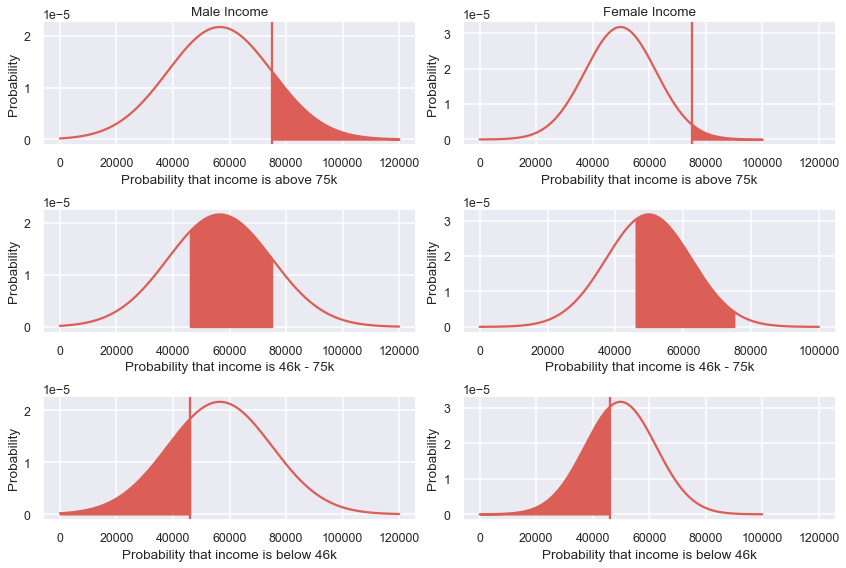

In [14]:
# Visualizing the data
# Males 75k
ax1 = plt.subplot(321)
x_axis_M = np.arange(0, 120000, 25)
x1 = np.linspace(75000, 120000)
y1 = norm.pdf(x1, MI_mu, MI_sigma)
plt.axvline(x=75000, c=(0.86, 0.3712, 0.339))
plt.fill_between(x1, y1, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis_M, norm.pdf(x_axis_M, MI_mu, MI_sigma))
plt.xlabel('Probability that income is above 75k')
plt.ylabel('Probability')
plt.title('Male Income')

# Females 75k
ax2 = plt.subplot(322, sharex=ax1)
x_axis_F = np.arange(0, 100000, 25)
x2 = np.linspace(75000, 100000)
y2 = norm.pdf(x2, FI_mu, FI_sigma)
plt.axvline(x=75000, c=(0.86, 0.3712, 0.339))
plt.fill_between(x2, y2, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis_F, norm.pdf(x_axis_F, FI_mu, FI_sigma))
plt.xlabel('Probability that income is above 75k')
plt.ylabel('Probability')
plt.title('Female Income')

# Males 46k - 75k
ax3 = plt.subplot(323)
x3 = np.linspace(46000, 75000)
y3 = norm.pdf(x3, MI_mu, MI_sigma)
plt.fill_between(x3, y3, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis_M, norm.pdf(x_axis_M, MI_mu, MI_sigma))
plt.xlabel('Probability that income is 46k - 75k')
plt.ylabel('Probability')

# Females 46k - 75k
ax4 = plt.subplot(324)
x4 = np.linspace(46000, 75000)
y4 = norm.pdf(x4, FI_mu, FI_sigma)
plt.fill_between(x4, y4, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis_F, norm.pdf(x_axis_F, FI_mu, FI_sigma))
plt.xlabel('Probability that income is 46k - 75k')
plt.ylabel('Probability')

# Males 46k
ax5 = plt.subplot(325, sharex=ax1)
x5 = np.linspace(0, 46000)
y5 = norm.pdf(x5, MI_mu, MI_sigma)
plt.axvline(x=46000, c=(0.86, 0.3712, 0.339))
plt.fill_between(x5, y5, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis_M, norm.pdf(x_axis_M, MI_mu, MI_sigma))
plt.xlabel('Probability that income is below 46k')
plt.ylabel('Probability')

# Females 46k
ax6 = plt.subplot(326, sharex=ax1)
x6 = np.linspace(0, 46000)
y6 = norm.pdf(x6, FI_mu, FI_sigma)
plt.axvline(x=46000, c=(0.86, 0.3712, 0.339))
plt.fill_between(x6, y6, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis_F, norm.pdf(x_axis_F, FI_mu, FI_sigma))
plt.xlabel('Probability that income is below 46k')
plt.ylabel('Probability')

plt.tight_layout(rect=(0, 0, 2, 2))

### 2.1 Insights:

The three treadmill products can be seperated into three income brackets.
- TM195: 46,000 and below
- TM498: Between 46,000 and 75,000
- TM798: 75,000 and above

For the first two treadmills, the product is split evenly between gender. The last treadmill, TM798, is heavily favored by males. This is likely due to the fact that only 2.25% of females earn enough to afford it. In general, females consistently earn less than males in all brackets. In fact, in this data set women earn an average of 7,000 less than their male counterparts. This does not seem to disuade them from purchusing treadmills however, as they are even in the amount of units purchased. The income percentage split between genders is:
- 46,000 and below
    - Females: 38%
    - Males: 28%
- Between 46,000 and 75,000
    - Females: 53.5%
    - Males: 52%
- Above 75,000
    - Females: 2.5%
    - Males: 16%
    
Another point of interest is that the standard deviation for income is steady at 9,000 for the first two treadmills. The final treadmill type has a much more extreme deviation of almost 20,000. This suggests that their are some fitness enthusiasts that may not earn as much, but are willing to spend the money regardless.

Age and education are also positvely corellated with income. Thus as age and education go up, so to does the customers average income. Marital status seems to have some effect as well. Those who are married appear to enjoy an increased average income as well.

Finally, it is important to note that there is slight difference in the sample sizes for males and females. There are 104 males to 76 females in the data set creating a 60/40 split in favor of males. There are two possible reasons for this:
   1. The income gap at the top end has created a disparity in ownership for the TM798, thus creating the skew in favor of males
   2. Males may be more inherently likely to buy treadmills overall. However, with the exception of the TM798, there is not much data to support this.

Overall, the majority of customers (about 77%) own either a TM195 of TM498. The TM798 is the least owned at only 22% and is mostly owned by men due to the income gap at the top end between genders. Additionally, education, age, and to some degree, marital status are positively correlated with income and can be used as indicators for which income bracket the customer may be part of.

### Step 2.2: What is the relationship between miles run and each product (sorted by gender)?

#### Overview of relevant data:

               Miles                       
                 sum        mean        std
Product Gender                             
TM195   Female  3048   76.200000  27.988276
        Male    3575   89.375000  28.573511
TM498   Female  2533   87.344828  33.456022
        Male    2743   88.483871  33.625259
TM798   Female  1260  180.000000  63.245553
        Male    5416  164.121212  60.014455


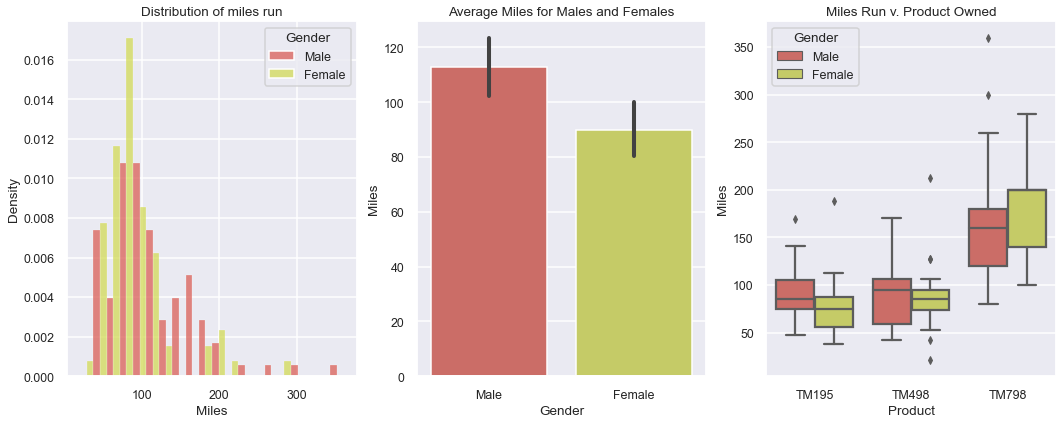

In [15]:
# Dataframe containing the relationship between miles run and product sorted by gender
print(CGF.groupby(['Product', 'Gender']).agg({'Miles':['sum', 'mean', 'std']}))

# Visualizing the data
fig, axes = plt.subplots(1, 3)
sns.histplot(CGF, x='Miles', hue='Gender', multiple='dodge', stat='density', common_norm=False, ax=axes[0]);
axes[0].set_title('Distribution of miles run')
sns.barplot(data=CGF, y='Miles', x='Gender', ax=axes[1])
axes[1].set_title("Average Miles for Males and Females")
sns.boxplot(x=CGF['Product'], y=CGF['Miles'], hue=CGF['Gender'], ax=axes[2]);
axes[2].set_title('Miles Run v. Product Owned')
plt.tight_layout(rect=(0, 0, 2.5, 1.5))

#### Investigating product bracket percentages for miles run sorted by gender

In [16]:
# Setting mean and standard deviation for miles run for genders
MM_mu = CGF_G.loc[('Male', 'Miles')].mean()
MM_sigma = CGF_G.loc[('Male', 'Miles')].std()
FM_mu = CGF_G.loc[('Female', 'Miles')].mean()
FM_sigma = CGF_G.loc[('Female', 'Miles')].std()

# Calculating the probability for each product
# The mean amount of miles run by men is the same for TM195 and TM498, so we will combine them
# The mean amount of miles run by females on the TM798 is small, and thus may be considered an outlier
# Because of this, we will not consider the middle bracket as it will skew the percentages.
MMiles_TM798 = (1 - norm.cdf(164, MM_mu, MM_sigma))
FMiles_TM798 = (1 - norm.cdf(180, FM_mu, FM_sigma))
MMiles_TM195 = norm.cdf(89, MM_mu, MM_sigma)
FMiles_TM195 = norm.cdf(76, FM_mu, FM_sigma)


# Reading out probability for each bracket
print('The upper bracket of miles run by males is', round(MMiles_TM798 * 100, 4), 'percent')
print('The upper bracket of miles run by females is', round(FMiles_TM798 * 100, 4), 'percent')
print('The lower bracket of miles run by males is', round(MMiles_TM195 * 100, 4), 'percent')
print('The lower bracket of miles run by females is', round(FMiles_TM195 * 100, 4), 'percent')

The upper bracket of miles run by males is 17.477 percent
The upper bracket of miles run by females is 2.2247 percent
The lower bracket of miles run by males is 33.1573 percent
The lower bracket of miles run by females is 37.7173 percent


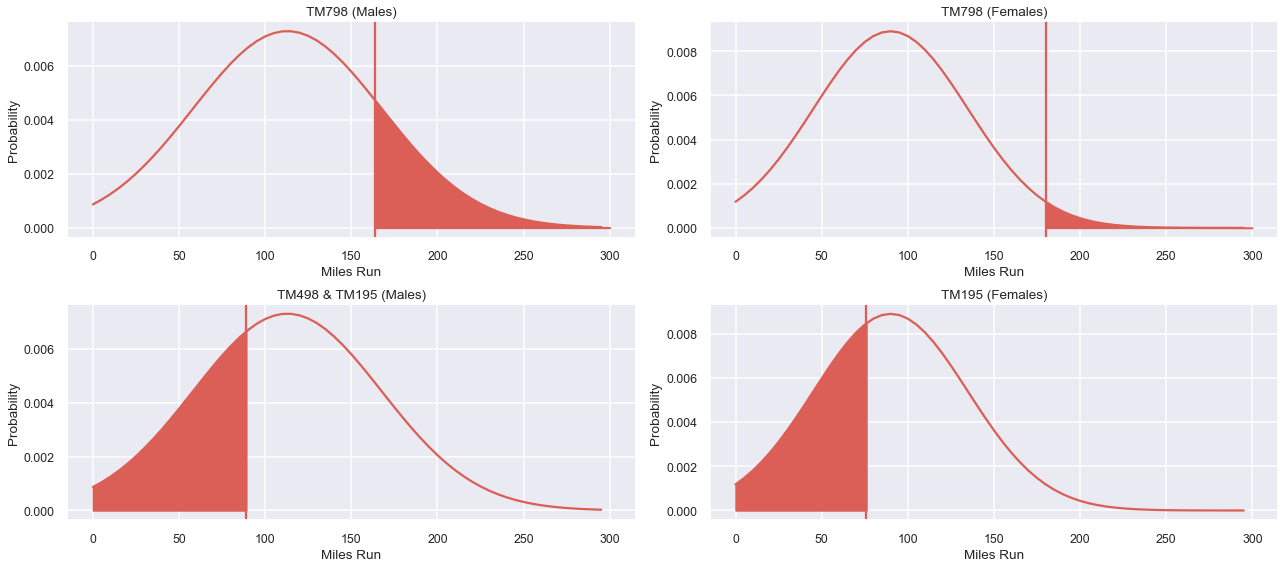

In [17]:
# Visualizing the data
# TM798 (Males)
ax1 = plt.subplot(221)
x_axis = np.arange(0, 300, 5)
x1 = np.linspace(164, 300)
y1 = norm.pdf(x1, MM_mu, MM_sigma)
plt.axvline(x=164, c=(0.86, 0.3712, 0.339))
plt.fill_between(x1, y1, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, MM_mu, MM_sigma))
plt.ylabel('Probability')
plt.xlabel('Miles Run')
plt.title('TM798 (Males)')

# TM798 (Females)
ax2 = plt.subplot(222, sharex=ax1)
x2 = np.linspace(180, 300)
y2 = norm.pdf(x2, FM_mu, FM_sigma)
plt.axvline(x=180, c=(0.86, 0.3712, 0.339))
plt.fill_between(x2, y2, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, FM_mu, FM_sigma))
plt.ylabel('Probability')
plt.xlabel('Miles Run')
plt.title('TM798 (Females)')

# TM195 (Males)
ax3 = plt.subplot(223, sharex=ax1)
x3 = np.linspace(0, 89)
y3 = norm.pdf(x3, MM_mu, MM_sigma)
plt.fill_between(x3, y3, color=(0.86, 0.3712, 0.339))
plt.axvline(x=89, c=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, MM_mu, MM_sigma))
plt.ylabel('Probability')
plt.xlabel('Miles Run')
plt.title('TM498 & TM195 (Males)')

# TM195 (Females)
ax4 = plt.subplot(224, sharex=ax1)
x4 = np.linspace(0, 76)
y4 = norm.pdf(x4, FM_mu, FM_sigma)
plt.fill_between(x4, y4, color=(0.86, 0.3712, 0.339))
plt.axvline(x=76, c=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, FM_mu, FM_sigma))
plt.ylabel('Probability')
plt.xlabel('Miles Run')
plt.title('TM195 (Females)')

# Adjusting the margins and displaying the plots
plt.tight_layout(rect=(0, 0, 3, 2))
plt.show();

### 2.2 Insights:


#### TM798
For the TM798, females (on average) run far more miles than men. This is misleading however as the sample size for females for the TM798 is very small when compared to their male counterparts. It's possible that with more purchases that this advantage would even out. It is important to note that the females that do run on the TM798 are in the top 2% of miles run within their gender. In comparison, males are in the top 17%. Additionally, the total amount of miles run is far greater for males at nearly 5500. However, despite only 7 females owning the treadmill, they have made up over a quarter of that total at 1260 miles run. It is apparent that the females that do own a TM798 make heavy use of this product.

#### TM498 and TM195
For the TM498, both genders run the same amount on average as the TM195 and are in the same percentile (33%). Initially it appears that the total amount of miles expected to run is significantly different. However, when the difference in units owned is considered, the difference between the two models is negligable.

### 2.3: Investigating the relationship between product, weekly usage, and fitness level.

#### Overview of relevant data:

               Usage                    
                 sum      mean       std
Product Gender                          
TM195   Female   116  2.900000  0.777900
        Male     131  3.275000  0.750641
TM498   Female    91  3.137931  0.915117
        Male      93  3.000000  0.683130
TM798   Female    35  5.000000  0.816497
        Male     156  4.727273  0.977008
 
               Fitness                    
                   sum      mean       std
Product Gender                            
TM195   Female     115  2.875000  0.647975
        Male       122  3.050000  0.677476
TM498   Female      83  2.862069  0.693034
        Male        91  2.935484  0.573613
TM798   Female      32  4.571429  0.786796
        Male       153  4.636364  0.652791


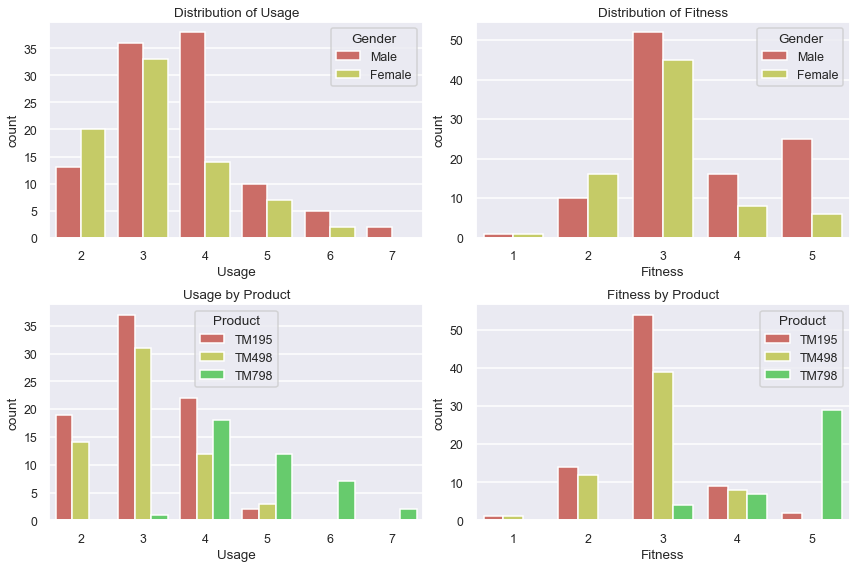

In [18]:
# Dataframe containing the relationship between usage and product sorted by gender
print(CGF.groupby(['Product', 'Gender']).agg({'Usage':['sum', 'mean', 'std']}))
print(' ')

# Dataframe containing the relationship between fitness level and product sorted by gender
print(CGF.groupby(['Product', 'Gender']).agg({'Fitness':['sum', 'mean', 'std']}))

# Visualizing the data
fig, axes = plt.subplots(2, 2)
sns.countplot(data=CGF, x='Usage', hue='Gender', ax=axes[0, 0]);
axes[0, 0].set_title('Distribution of Usage');
sns.countplot(data=CGF, x='Fitness', hue='Gender', ax=axes[0, 1]);
axes[0, 1].set_title('Distribution of Fitness');
sns.countplot(data=CGF, x='Usage', hue='Product', ax=axes[1, 0]);
axes[1, 0].set_title('Usage by Product');
sns.countplot(data=CGF, x='Fitness', hue='Product', ax=axes[1, 1]);
axes[1, 1].set_title('Fitness by Product');

plt.tight_layout(rect=(0, 0, 2, 2))

### 2.3 Insights

Both the TM195 and TM498 have a mean usage of 3 times per week. Similarly, the mean fitness level is about 3 as well. Total usage and fitness appears to be higher for the TM195, however this is likely due to the fact that there are fewer TM498's owned. 

Once again, the TM798 features a higher average usage of 5 times per week as well as higher fitness level. This continues to reinforce the image of the TM798 being a highend product used by those who are avid runners.

In terms of gender, there seems to be no difference between males and females in either usage or fitness level. As before, differences in the TM798 between gender due to the extreme difference in sample size.

### Step 2.4: Is their a correlation between marital status, education, or age versus which product is purchased?

#### Overview of relevant data:

In [19]:
print(CGF.groupby(['Product']).agg({'MaritalStatus':'value_counts'}))

# Determining percentage of customers that are married versus single for each product type
print(' ')
print('The percentage of customers who own a TM195 and are married is', round(((48 * 100)/80), 4), 'percent')
print('The percentage of customers who own a TM498 and are married is', round(((36 * 100)/60), 4), 'percent')
print('The percentage of customers who own a TM798 and are married is', round(((23 * 100)/40), 4), 'percent')

                       MaritalStatus
Product MaritalStatus               
TM195   Partnered                 48
        Single                    32
TM498   Partnered                 36
        Single                    24
TM798   Partnered                 23
        Single                    17
 
The percentage of customers who own a TM195 and are married is 60.0 percent
The percentage of customers who own a TM498 and are married is 60.0 percent
The percentage of customers who own a TM798 and are married is 57.5 percent


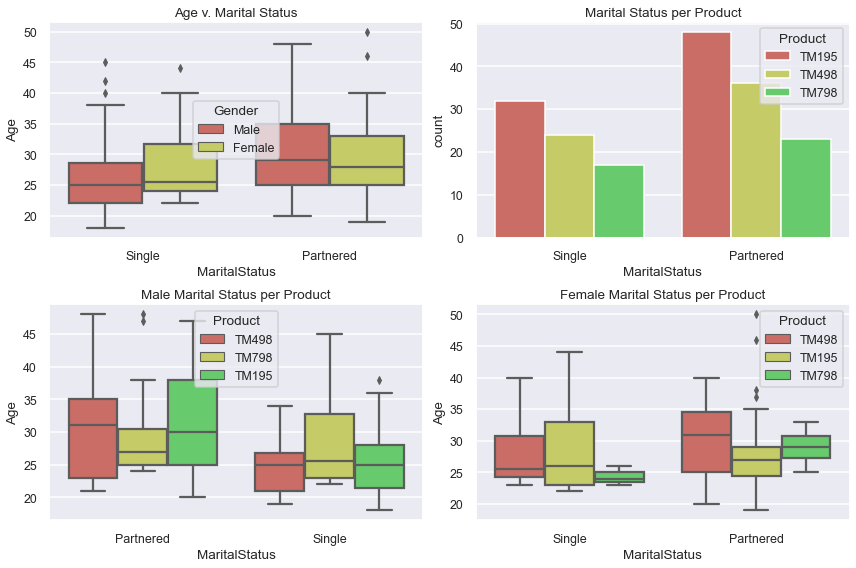

In [20]:
# Visualizing the data
fig, axes = plt.subplots(2, 2)
sns.boxplot(data=CGF, x='MaritalStatus', y='Age', hue='Gender', ax=axes[0, 0]);
axes[0, 0].set_title('Age v. Marital Status');
sns.countplot(data=CGF, x='MaritalStatus', hue='Product', ax=axes[0, 1]);
axes[0, 1].set_title('Marital Status per Product');
sns.boxplot(data=CGF_G.loc['Male'], x='MaritalStatus', y='Age', hue='Product', ax=axes[1, 0]);
axes[1, 0].set_title('Male Marital Status per Product');
sns.boxplot(data=CGF_G.loc['Female'], x='MaritalStatus', y='Age', hue='Product', ax=axes[1, 1]);
axes[1, 1].set_title('Female Marital Status per Product');

plt.tight_layout(rect=(0, 0, 2, 2))

In [1]:
# Dataframe of education sorted by product
print(CGF.groupby(['Product', 'Gender']).agg({'Education':['mean', 'std', 'min', 'max']}))
print(' ')
# Dataframe of age sorted by product
print(CGF.groupby(['Product', 'Gender']).agg({'Age':['mean', 'std', 'min', 'max']}))

# Creating the subplot grid
fig = plt.figure()
gs = GridSpec (2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Visualizing the data
sns.histplot(data=CGF, x='Education', hue='Gender', multiple='dodge', stat='density', common_norm=False, ax=ax1);
ax1.set_title('Distribution of Education');
sns.boxplot(data=CGF, x='Product', y='Education', hue='Gender', ax=ax2);
ax2.set_title('Level of Education v. Product');
sns.histplot(data=CGF, x='Age', hue='Gender', multiple='dodge', stat='density', common_norm=False, ax=ax3);
ax3.set_title('Distribution of Age')
sns.boxplot(data=CGF, x='Product', y='Age', hue='Gender', ax=ax4);
ax4.set_title('Age v. Product');

plt.tight_layout(rect=(0, 0, 2.5, 2))

NameError: name 'CGF' is not defined

Determining the percentage of customers under and over the age of 35, sorted by gender.

In [22]:
# Setting mean and standard deviation for miles run for genders
AM_mu = CGF_G.loc[('Male', 'Age')].mean()
AM_sigma = CGF_G.loc[('Male', 'Age')].std()
AF_mu = CGF_G.loc[('Female', 'Age')].mean()
AF_sigma = CGF_G.loc[('Female', 'Age')].std()

# Calculating the probability for each product
AM_Higher = (1 - norm.cdf(35, AM_mu, AM_sigma))
AF_Higher = (1 - norm.cdf(35, AF_mu, AF_sigma))
AM_Lower = norm.cdf(35, AM_mu, AM_sigma)
AF_Lower = norm.cdf(35, AF_mu, AF_sigma)


# Reading out probability for each bracket
print('The probability of males over 35 owning a treadmill is', round(AM_Higher * 100, 4), 'percent')
print('The probability of females over 35 owning a treadmill is', round(AF_Higher * 100, 4), 'percent')
print('The probability of males under 35 owning a treadmill is', round(AM_Lower * 100, 4), 'percent')
print('The probability of females under 35 owning a treadmill is', round(AF_Lower * 100, 4), 'percent')

The probability of males over 35 owning a treadmill is 20.618 percent
The probability of females over 35 owning a treadmill is 15.5167 percent
The probability of males under 35 owning a treadmill is 79.382 percent
The probability of females under 35 owning a treadmill is 84.4833 percent


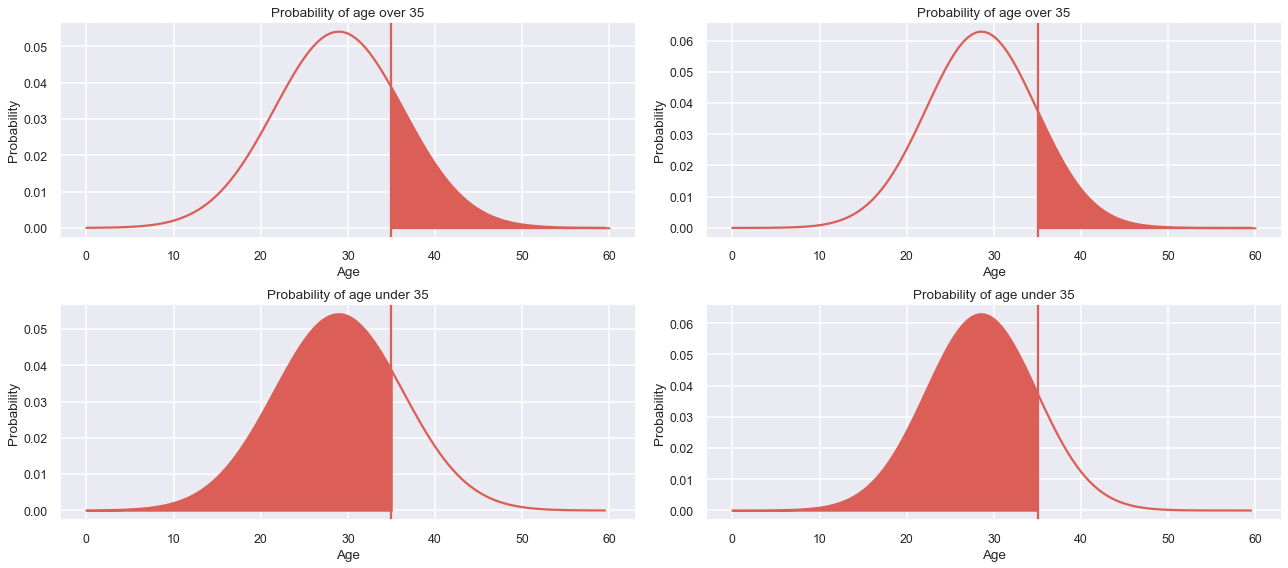

In [23]:
# Visualizing the data

# Probability over 35 Males
ax1 = plt.subplot(221)
x_axis = np.arange(0, 60, 0.5)
x1 = np.linspace(35, 60)
y1 = norm.pdf(x1, AM_mu, AM_sigma)
plt.axvline(x=35, c=(0.86, 0.3712, 0.339))
plt.fill_between(x1, y1, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, AM_mu, AM_sigma))
plt.ylabel('Probability')
plt.xlabel('Age')
plt.title('Probability of age over 35')

# Probability over 35 Females
ax2 = plt.subplot(222, sharex=ax1)
x2 = np.linspace(35, 60)
y2 = norm.pdf(x2, AF_mu, AF_sigma)
plt.axvline(x=35, c=(0.86, 0.3712, 0.339))
plt.fill_between(x2, y2, color=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, AF_mu, AF_sigma))
plt.ylabel('Probability')
plt.xlabel('Age')
plt.title('Probability of age over 35')

# Probability under 35 Males
ax3 = plt.subplot(223, sharex=ax1)
x3 = np.linspace(0, 35)
y3 = norm.pdf(x3, AM_mu, AM_sigma)
plt.fill_between(x3, y3, color=(0.86, 0.3712, 0.339))
plt.axvline(x=35, c=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, AM_mu, AM_sigma))
plt.ylabel('Probability')
plt.xlabel('Age')
plt.title('Probability of age under 35')

# Probability under 35 Females
ax4 = plt.subplot(224, sharex=ax1)
x4 = np.linspace(0, 35)
y4 = norm.pdf(x4, AF_mu, AF_sigma)
plt.fill_between(x4, y4, color=(0.86, 0.3712, 0.339))
plt.axvline(x=35, c=(0.86, 0.3712, 0.339))
plt.plot(x_axis, norm.pdf(x_axis, AF_mu, AF_sigma))
plt.ylabel('Probability')
plt.xlabel('Age')
plt.title('Probability of age under 35')

# Adjusting the margins and displaying the plots
plt.tight_layout(rect=(0, 0, 3, 2))
plt.show();

### 2.4 Insights:
 
There is a slight difference in the porportion of customers that are partnered and those that are single. Across each product, there is about a 60/40 split for partnered to single. This suggests that those who are partnered are more likely to purchase a treadmill, perhaps due increased likelyhood of higher income as shown in earlier observations, although more data would be required to confirm this speculation.

Furthermore, there are some differences in age range across each product. Males who are single, are an average of 5 years younger for all product types, with the TM798 featuring the youngest age group. Partnered males who own the TM498 and TM195 are, on average 30 or older. For females who are single, the mean age is the same across each product type at 25 years of age. Partnered Females who own the TM798 or TM498 are about 6 years older on average than their single counterparts. There is no significant difference between single and married females who own the TM195.

Education appears to be slightly higher on average (about 2.5 years more) for those who own the TM798. This is likely due to the high correlation between higher education and income level. Those with higher education are more likely to earn more, and thus more likely be able to afford the TM798.

There appears to be a slight negative correlation between age and which product is purchased, especially when compared with marital status. In general, those who are single are younger, and those who are married are older in age. Finally, customers who own the TM798 tend to be younger overall when compared to the TM498 and TM195.

## Step 3: Final reccomendations and creating a customer profile:

#### TM798
- Disporportionatly Male
- Higher average age
- More likely to be married
- High level of fitness and usage
- High amount of miles run
- High bracket for income
- Higher level of education

#### TM498
- Even distribution of Male to Female
- Lower average age
- More likely to be married
- Average level of fitness and usage
- Average amount of miles run
- Middle bracket for income
- Lower level of education

#### TM195
- Even distribution of Male to Female
- Lower average age
- More likely to be married
- Average level of fitness and usage
- Average amount of miles run
- Lower level of education

The single most indicative inidactor of what product a customer is most likely to buy is income. Those with the highest income overwhelmingly purchase the TM798, those in the middle bracket for income purchase the TM498, and the TM195 is owned by those within the lowest bracket. Income level can further be inferred by the customers age, educational level, and marital status. Those who have a higher age, better education, and are married are more likely to have better income and thus more likely to purchase a more expensive model of treadmill. 

General customer profiles for treadmills are as follows:
 - The target age across all products is between 25 and 35. Those who are above this age bracket who have not already bought a treadmill are not likely to buy one.
 - Those target fitness level is 3/5 or higher. Those with a lower level than 3 are unlikely to buy.
     - Note: Fitness level is self-rated. The customer only needs to view themselves as a level 3 for this to hold.
 - Simarilarly the usage target is 3 times a week or higher. Those whose usage is less than that are unlikely to buy.
 - Those who are married are more likely to buy, but only slightly.